In [ ]:
from assets.options import Option
from assets.stocks import Stock


    def __init__(self,  underlying_asset,
                        time_to_maturity=1,
                        strike_price=0,
                        current_price=0):
                
        self.t = time_to_maturity #time to maturity
        self.k = strike_price #strike_price
        self.p0 = current_price #price at 0
        self.underlying_asset = underlying_asset
        self.type = "put" # long-put, long-call, short-put, short-call

In [ ]:
def get_min_price(optionA,optionB,stock):
    B = (optionA.p0-stock.p0)/-optionA.k
    return stock.p0-optionB.k*B

s = Stock(p0=41.6)
co1 = Option(s, time_to_maturity=1, strike_price=20,current_price=22.2)
co2 = Option(s, time_to_maturity=1, strike_price=40)
get_min_price(co1,co2,s) # 2.7999999

In [ ]:
co1.get_current_price()
co1.get_future_price(1,0.01) # 22.422

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
class PayoffDiagram:
    
    ''' Create a Payoff Diagram
    '''

    def build_w_stock_change(self,price_range, portfolio):
        ''' Inputs:
                price_range (int tuple): range of prices for underlying asset
                portfolio ([]options): portfolio of options
        '''
        xmin, xmax = price_range
        stock_prices = np.linspace(xmin, xmax, 10)
        calculate_payoff = lambda e: sum([option.get_payoff(stock_price=e) for option in portfolio])
        payoff = list(map(calculate_payoff,stock_prices))
        
        plt.title(f"Payoff Diagram for \n {[option for option in portfolio]}")
        plt.plot(stock_prices, payoff)
        plt.xlabel('Stock Price')
        plt.ylabel('Payoffs')
        x1,x2, _, _ = plt.axis()  
        plt.axis((x1,x2,-200,200))
        plt.axhline(y = 0, color="black")
        plt.show()


In [ ]:
portfolio = [co1,co2]
d = PayoffDiagram()
d.build_w_stock_change((0,140),*portfolio)

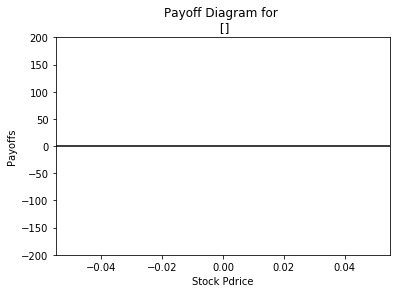

NameError: name 'plt' is not defined

In [2]:
from assets.stocks import Stock
from assets.options import Option

s = Stock(p0=41.6)
co1 = Option(s, time_to_maturity=1, strike_price=20,current_price=22.2)
co2 = Option(s, time_to_maturity=1, strike_price=40)

co1.build_payoff_diagram((0,140))